In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import numpy as np
from numpy.polynomial.polynomial import polyfit
import seaborn as sns
import calendar

import geopandas as gpd
from geopandas.tools import sjoin

In [2]:

df1999 = pd.read_csv('/Users/anjalidoney/Downloads/resale-flat-prices/resale-flat-prices-based-on-approval-date-1990-1999.csv')
df2012 = pd.read_csv('/Users/anjalidoney/Downloads/resale-flat-prices/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
df2018 = pd.read_csv('/Users/anjalidoney/Downloads/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2015-onwards.csv')
df2014 = pd.read_csv('/Users/anjalidoney/Downloads/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')


In [100]:
testdf = df1999.append([df2012,df2014,df2018])
testdf.head(5)

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town
0,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,9000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO
1,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,6000.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO
2,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,8000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO
3,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,6000.0,07 TO 09,ANG MO KIO AVE 1,ANG MO KIO
4,216,NEW GENERATION,3 ROOM,73.0,1976,1990-01,NaN,47200.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO


In [101]:
testdf.isnull().values.any()

True

In [5]:
testdf.corr(method='pearson')

,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
floor_area_sqm,1.000000,0.504830,0.340287,0.638417
lease_commence_date,0.504830,1.000000,0.995742,0.491572
remaining_lease,0.340287,0.995742,1.000000,0.352230
resale_price,0.638417,0.491572,0.352230,1.000000


### Note 1: There is a high correlation between lease commence data and remaining lease, for logical reasons, so we should only use one of them

In [6]:
testdf[testdf.isnull().any(axis=1)]

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town
0,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,9000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO
1,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,6000.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO
2,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,8000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO
3,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,6000.0,07 TO 09,ANG MO KIO AVE 1,ANG MO KIO
4,216,NEW GENERATION,3 ROOM,73.0,1976,1990-01,NaN,47200.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO
5,211,NEW GENERATION,3 ROOM,67.0,1977,1990-01,NaN,46000.0,01 TO 03,ANG MO KIO AVE 3,ANG MO KIO
6,202,NEW GENERATION,3 ROOM,67.0,1977,1990-01,NaN,42000.0,07 TO 09,ANG MO KIO AVE 3,ANG MO KIO
7,235,NEW GENERATION,3 ROOM,67.0,1977,1990-01,NaN,38000.0,10 TO 12,ANG MO KIO AVE 3,ANG MO KIO
8,235,NEW GENERATION,3 ROOM,67.0,1977,1990-01,NaN,40000.0,04 TO 06,ANG MO KIO AVE 3,ANG MO KIO
9,232,NEW GENERATION,3 ROOM,67.0,1977,1990-01,NaN,47000.0,01 TO 03,ANG MO KIO AVE 3,ANG MO KIO


### Note 2: Use lease commence data rather than remaining lease (due to null values)

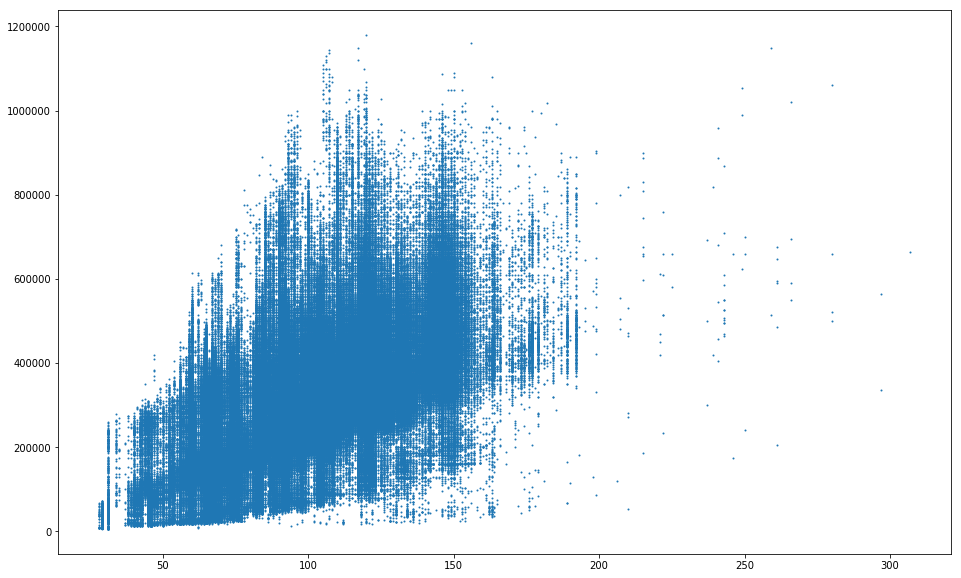

In [9]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.scatter(testdf.floor_area_sqm, testdf.resale_price,1)
plt.show()

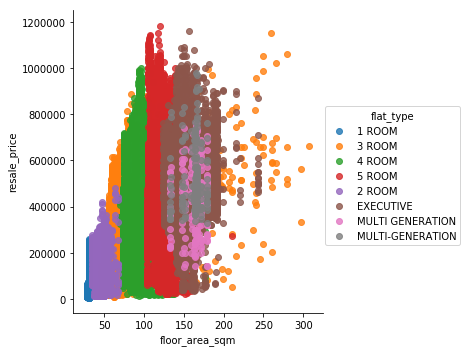

In [25]:
#fig, ax = plt.subplots()
#fig.set_size_inches(11.7, 8.27)

# plt.rcParams['figure.figsize'] = [20, 10]

plt.figure(figsize=(20,15))
sns.lmplot( x="floor_area_sqm", y="resale_price", data=testdf, fit_reg=False, hue='flat_type', scatter='true',legend=True)
 
# Move the legend to an empty part of the plot
#plt.legend(loc='lower right')


### This plot shows the strong correlation between floor area and flat type. Looking at the same for flat model:

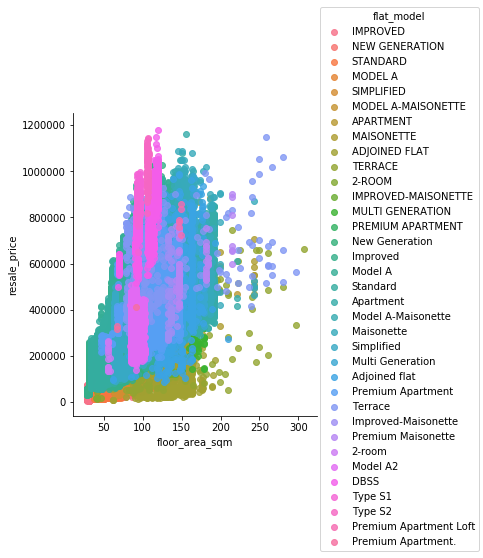

In [27]:
sns.lmplot( x="floor_area_sqm", y="resale_price", data=testdf, fit_reg=False, hue='flat_model', scatter='true',legend=True)

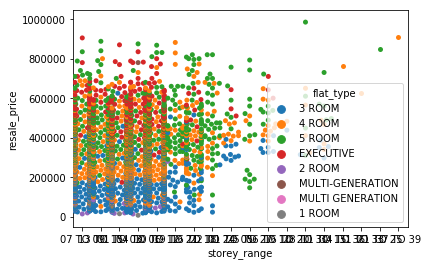

In [34]:
plotdf = testdf.sample(frac=0.01, random_state=1)

sns.swarmplot(x="storey_range", y="resale_price",data=plotdf,hue="flat_type")

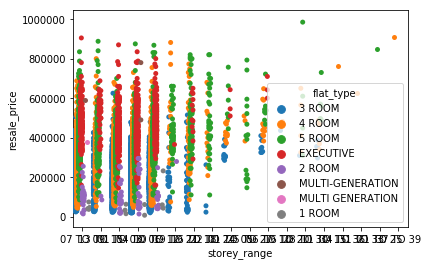

In [35]:
sns.swarmplot(x="storey_range", y="resale_price",data=plotdf,hue="flat_type",dodge=True)

In [42]:
testdf.dtypes

block                   object
flat_model              object
flat_type               object
floor_area_sqm         float64
lease_commence_date      int64
month                   object
remaining_lease        float64
resale_price           float64
storey_range            object
street_name             object
town                    object
dtype: object

### First let us look at relationship between numerical variables

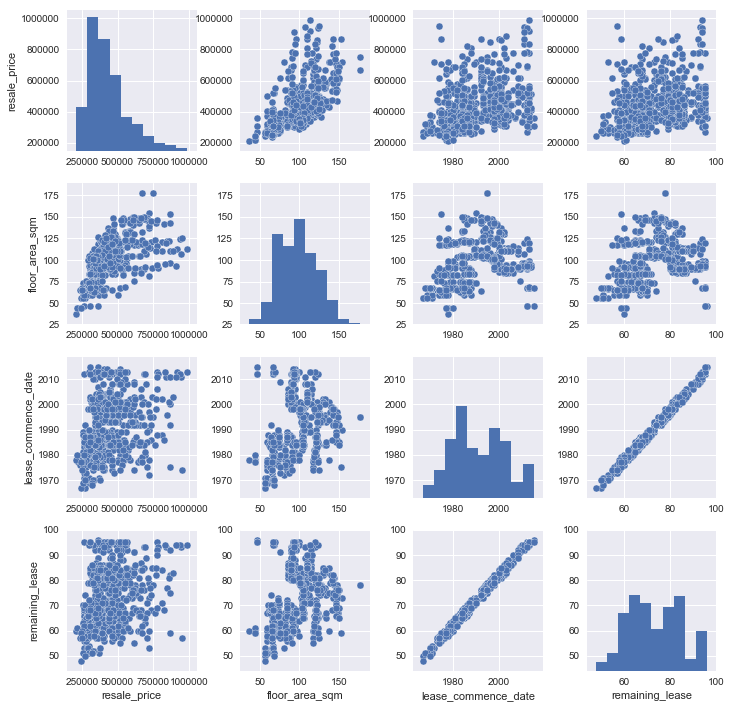

In [54]:
# sns.set()

subset = testdf[['resale_price', 'floor_area_sqm', 'lease_commence_date', 'remaining_lease']]
subset.head(5)

subset = subset.dropna()

plotdf2 = subset.sample(frac=0.01, random_state=1)

sns.pairplot(plotdf2[cols], size=2.5)
plt.show()


### Checking pairplots for full dataset (removing missing data)

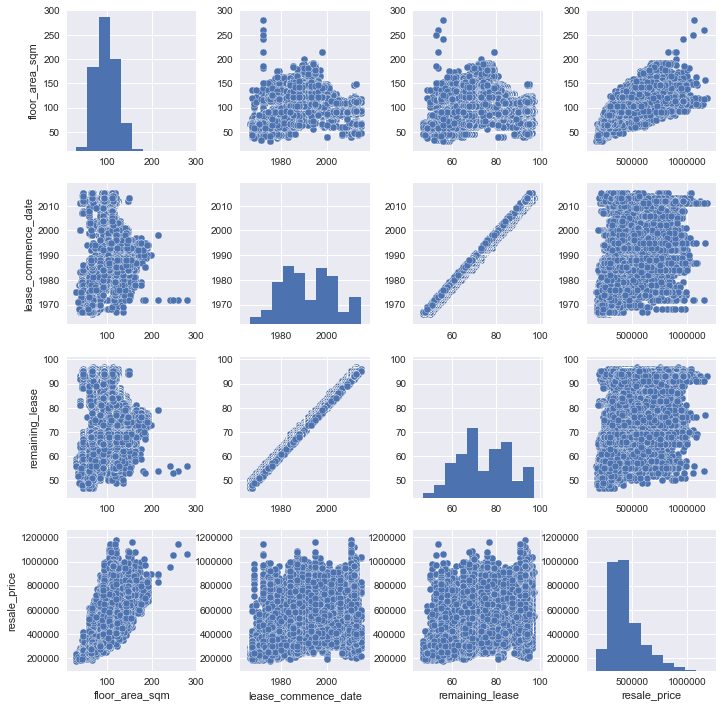

In [102]:
cols = list(testdf.columns.values)
testdfclean = testdf.dropna()

sns.pairplot(testdfclean[cols], size=2.5)
plt.show()


In [58]:
testdfclean.dtypes

block                   object
flat_model              object
flat_type               object
floor_area_sqm         float64
lease_commence_date      int64
month                   object
remaining_lease        float64
resale_price           float64
storey_range            object
street_name             object
town                    object
dtype: object

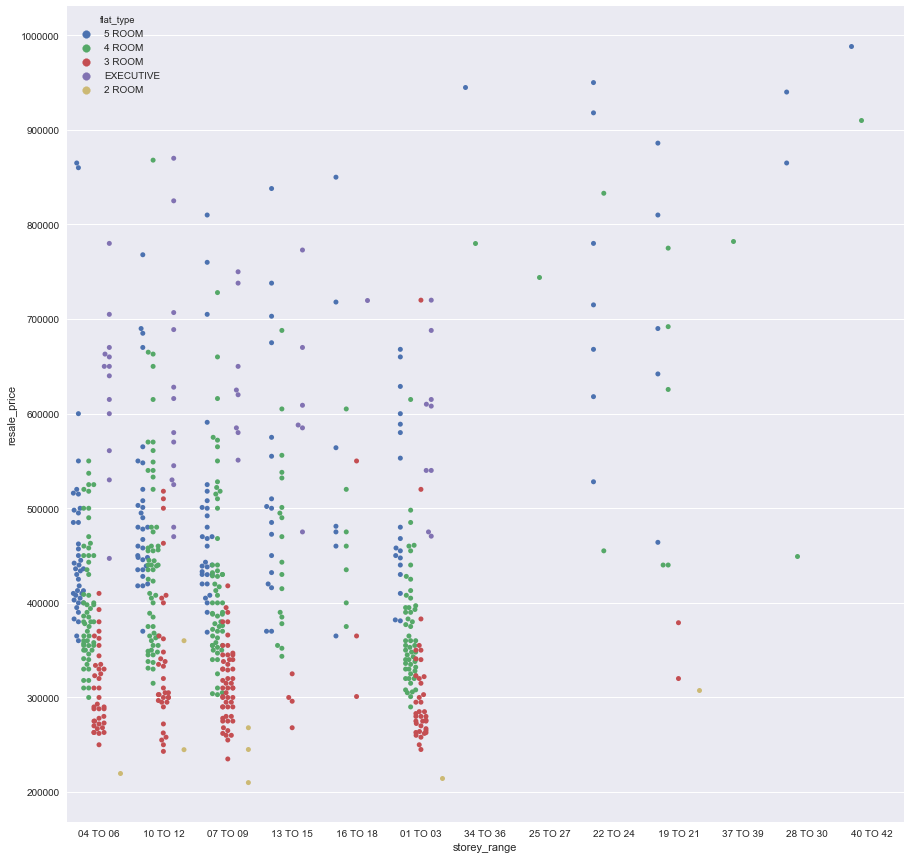

In [83]:
plt.figure(figsize=(15,15))
sns.set()
plotdf2 = testdfclean.sample(frac=0.01,random_state=1)
sns.swarmplot(x="storey_range", y="resale_price",data=plotdf2,hue="flat_type",dodge=True)
plt.show()

In [106]:
storey_sorted = sorted(testdf.storey_range.unique())
storey_sorted

['01 TO 03',
 '01 TO 05',
 '04 TO 06',
 '06 TO 10',
 '07 TO 09',
 '10 TO 12',
 '11 TO 15',
 '13 TO 15',
 '16 TO 18',
 '16 TO 20',
 '19 TO 21',
 '21 TO 25',
 '22 TO 24',
 '25 TO 27',
 '26 TO 30',
 '28 TO 30',
 '31 TO 33',
 '31 TO 35',
 '34 TO 36',
 '36 TO 40',
 '37 TO 39',
 '40 TO 42',
 '43 TO 45',
 '46 TO 48',
 '49 TO 51']

In [109]:
testdf['storey_range'] = testdf['storey_range'].astype('category')
testdf['storey_range'] = testdf['storey_range'].cat.reorder_categories(new_categories = storey_sorted, ordered=True)
testdf.storey_range.unique()

[10 TO 12, 04 TO 06, 07 TO 09, 01 TO 03, 13 TO 15, ..., 36 TO 40, 31 TO 35, 46 TO 48, 43 TO 45, 49 TO 51]
Length: 25
Categories (25, object): [01 TO 03 < 01 TO 05 < 04 TO 06 < 06 TO 10 ... 40 TO 42 < 43 TO 45 < 46 TO 48 < 49 TO 51]

In [107]:
testdf.dtypes

block                    object
flat_model               object
flat_type                object
floor_area_sqm          float64
lease_commence_date       int64
month                    object
remaining_lease         float64
resale_price            float64
storey_range           category
street_name              object
town                     object
dtype: object

/Users/anjalidoney/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1397: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


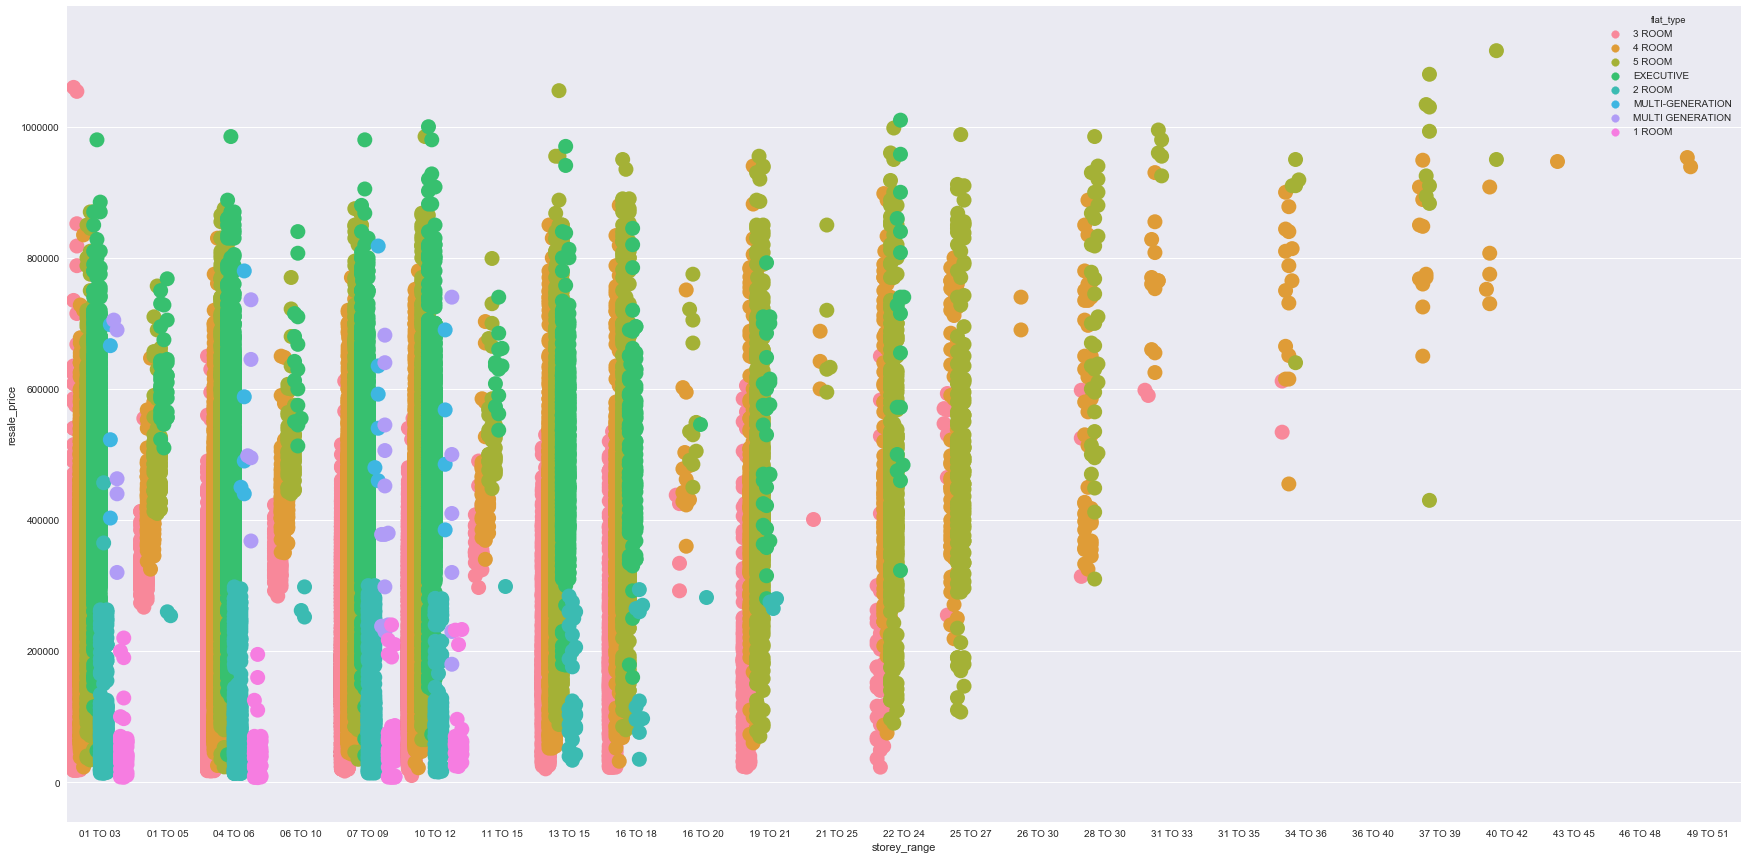

In [116]:
plt.figure(figsize=(30,15))
sns.set()

plotdf2 = testdf.sample(frac=0.1,random_state=1)
sns.swarmplot(x="storey_range", y="resale_price",data=plotdf2,hue="flat_type",dodge=True,size=15)
plt.show()